In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
import os

# Mount your Drive
drive.mount('/content/drive')

# Create a symlink to the specific folder
source_folder = '/content/drive/MyDrive/ECT'
target_folder = '/content/ECT'

if not os.path.exists(target_folder):
    os.symlink(source_folder, target_folder)
    print(f"Symlink created for {source_folder} at {target_folder}")

# Work directly with the symlink
files = os.listdir(target_folder)
print("Files in the target folder:", files)

Mounted at /content/drive
Symlink created for /content/drive/MyDrive/ECT at /content/ECT
Files in the target folder: ['OGHIST.xlsx', 'EDGAR_2024_GHG_booklet_2024.xlsx', 'Graph1.html', 'Graph2.gif', 'ne_110m_admin_0_countries', 'ne_10m_admin_2_counties', 'ne_50m_admin_0_countries']


In [ ]:
file_path = '/content/drive/MyDrive/ECT/EDGAR_2024_GHG_booklet_2024.xlsx'
# Read data from "Sheet2"
df = pd.read_excel(file_path, sheet_name='GHG_totals_by_country', engine='openpyxl')

In [ ]:
df

,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,ZWE,Zimbabwe,21.723583,22.320466,21.961987,23.569806,23.655384,22.966457,24.095056,23.302597,...,29.122990,30.205254,28.406508,27.886488,29.907540,28.369352,26.770627,28.878405,29.825427,31.019306
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,EU27,EU27,4591.422704,4615.906263,4767.686556,4986.348683,4946.211218,4858.723738,5122.759438,5111.491639,...,3825.528400,3879.728839,3889.377080,3912.269335,3830.658886,3678.016394,3388.278789,3577.018019,3482.310460,3221.794615
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# Euro Area countries and their joining years
euro_area_countries = {
    'Austria': 1999, 'Belgium': 1999, 'Cyprus': 2008, 'Estonia': 2014, 'Finland': 1999,
    'France': 1999, 'Germany': 1999, 'Greece': 2001, 'Ireland': 1999, 'Italy': 1999,
    'Latvia': 2015, 'Lithuania': 2019, 'Luxembourg': 1999, 'Malta': 2008, 'Netherlands': 1999,
    'Portugal': 1999, 'Slovakia': 2009, 'Slovenia': 2007, 'Spain': 1999
}

# Filter for Euro Area countries and adjust data for joining years
df_euro_area_adjusted = pd.DataFrame()

for country, join_year in euro_area_countries.items():
    country_data = df[df['Country'] == country]

    # Only include data from the year the country joined the Euro Area
    country_data_adjusted = country_data.iloc[:, 2:]  # Assuming emissions data starts from column index 2
    country_data_adjusted.columns = pd.to_numeric(country_data_adjusted.columns, errors='coerce')  # Convert years to numeric
    country_data_adjusted = country_data_adjusted.loc[:, country_data_adjusted.columns >= join_year]  # Filter columns after the joining year

    # Concatenate the adjusted country data to the final DataFrame
    df_euro_area_adjusted = pd.concat([df_euro_area_adjusted, country_data_adjusted])

# Sum emissions for Euro Area (adjusted)
euro_area_data = df_euro_area_adjusted.sum(axis=0)


# Initialize a DataFrame to hold adjusted Euro Area data (1970-2023)
years = list(range(1970, 2024))  # Full timeline
df_euro_area_adjusted = pd.DataFrame(np.nan, index=years, columns=euro_area_countries.keys())  # Initialize with NaN

# Populate the DataFrame with emissions data from each country
for country, join_year in euro_area_countries.items():
    country_data = df[df['Country'] == country]

    # Only include data from the year the country joined the Euro Area
    if not country_data.empty:
        emissions = country_data.iloc[0, 2:]  # Extract emissions data
        emissions.index = pd.to_numeric(emissions.index)  # Convert years to numeric
        emissions = emissions.loc[emissions.index >= join_year]  # Filter based on join year

        # Add data to the main DataFrame (before join year remains NaN)
        df_euro_area_adjusted.loc[emissions.index, country] = emissions

# Sum emissions for all Euro Area countries (ignores NaN automatically)
euro_area_data = df_euro_area_adjusted.sum(axis=1, skipna=True)  # Skip NaN values during summation





# Select EU27 and Global Total for plotting
eu27_data = df[df['Country'] == 'EU27']
eu27_data = eu27_data.iloc[:, 2:]
eu27_data.columns = pd.to_numeric(eu27_data.columns, errors='coerce')
eu27_data = eu27_data.transpose()


global_total_data = df[df['Country'] == 'GLOBAL TOTAL']
global_total_data = global_total_data.iloc[:, 2:]
global_total_data.columns = pd.to_numeric(global_total_data.columns, errors='coerce')
global_total_data = global_total_data.transpose()




<ipython-input-5-db0ac8fb261a>:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[83.402983178634 83.514060310591 88.423173190384 90.276045510392
 95.792057694892 95.636489202584 96.201540502504 93.767897933951
 90.639006641919 90.265316530338 82.749432587946 88.933580093273
 87.197488945325 83.831261169226 84.649350080258 81.020140728691
 82.16874390626 82.717423464051 85.163053666982 82.206921313217
 83.457355797915 77.27335419252 80.724159206338 75.408468643277
 72.921492529812]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_euro_area_adjusted.loc[emissions.index, country] = emissions
<ipython-input-5-db0ac8fb261a>:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[149.80095116072 151.19896445046 151.37585959672 143.51802940004
 147.21016129468 146.09742055099 143.06457523

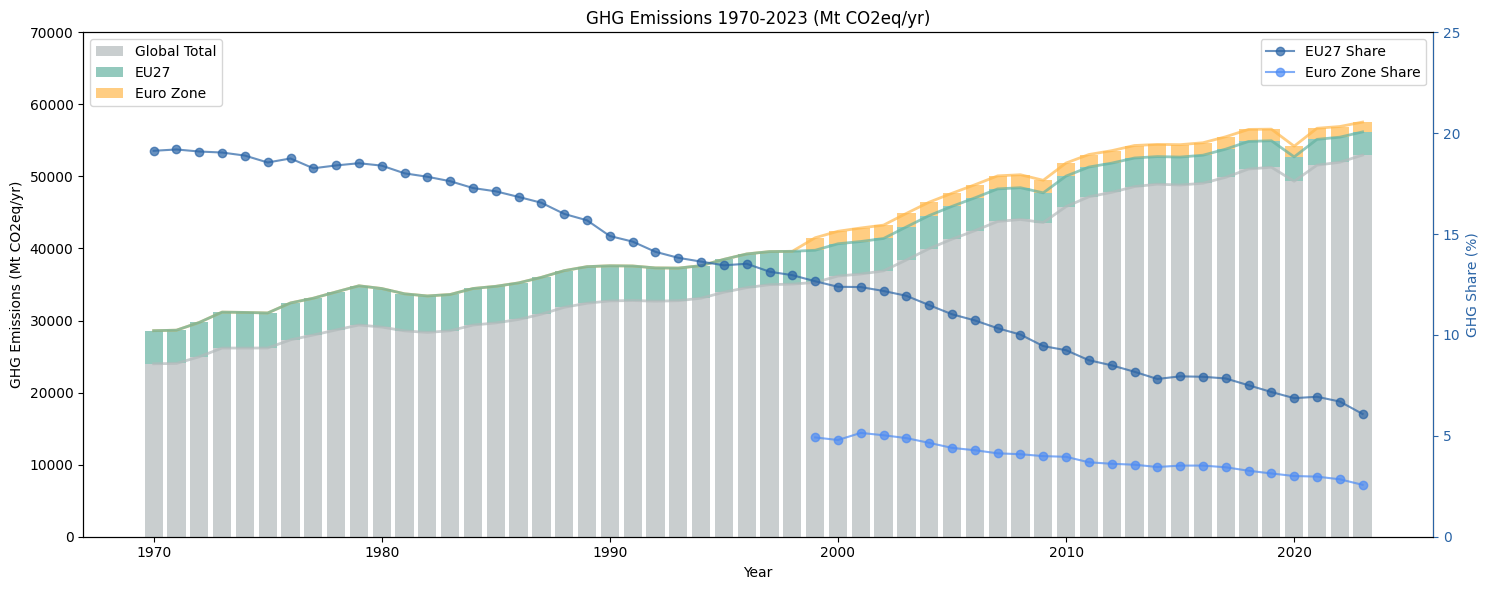

In [ ]:
# Ensure all data is aligned to the 'years' index
years = list(range(1970, 2024))  # Full timeline
global_total = global_total_data.iloc[:, 0]
eu27 = eu27_data.iloc[:, 0]
euro_area = euro_area_data

# Mask the euro_area data to skip zero values
mask = euro_area > 0
years_non_zero = np.array(years)[mask]
euro_area_non_zero = euro_area[mask]


# Plot the stacked bars
# Plot the stacked bars
fig, ax1 = plt.subplots(figsize=(15, 6))

# Bottom layer: Global Total
ax1.bar(years, global_total, label="Global Total", color='#B2BABB', alpha=0.7)

# Middle layer: EU27
ax1.bar(years, eu27,
        bottom=global_total, label="EU27", color='#66B3A1', alpha=0.7)

# Top layer: Euro area
ax1.bar(years, euro_area,
        bottom=global_total + eu27, label="Euro Zone", color='#FFB84D', alpha=0.7)




# Calculate the middle of each bar
bar_width = 1  # Adjust this if you are using a different bar width
bar_centers = np.array(years) + bar_width / 2 - 0.5  # Centers of bars

# Calculate the top middle points for each layer
middle_global = global_total  # Top of the first layer
middle_eu27 = global_total + eu27  # Middle of the second layer
middle_euro_area = global_total + eu27 + euro_area  # Middle of the third layer

# Plot lines connecting the top middle points for each layer
ax1.plot(bar_centers, middle_euro_area, color='#FFB84D', linestyle='-',  linewidth=2, alpha=0.7)
ax1.plot(bar_centers, middle_global, color='#B2BABB', linestyle='-',  linewidth=2, alpha=0.7)
ax1.plot(bar_centers, middle_eu27, color='#66B3A1', linestyle='-',  linewidth=2, alpha=0.7)




# Set the limits for the second y-axis between 5% and 25%
ax1.set_ylim(0, 70000)




# Create a second y-axis for EU27 contribution
ax2 = ax1.twinx()

# Calculate EU27 contribution percentage
contribution_percent_eu27 = (eu27 / global_total) * 100
contribution_percent_eu = (euro_area_non_zero / global_total) * 100

# Plot the contribution percentage on the secondary y-axis
ax2.plot(years, contribution_percent_eu27, label="EU27 Share", color='#2A64A6', marker='o', linestyle='-', alpha=0.7)
# Plot the contribution percentage on the secondary y-axis
ax2.plot(years, contribution_percent_eu, label="Euro Zone Share", color='#4C8BF5', marker='o', linestyle='-', alpha=0.7)

# Set the limits for the second y-axis between 5% and 25%
ax2.set_ylim(0, 25)
# Set the color of the second y-axis to match the line plot color
ax2.tick_params(axis='y', labelcolor='#2A64A6')
ax2.set_ylabel("GHG Share (%)", color='#2A64A6')
# Change the color of the right y-axis line and ticks
ax2.spines['right'].set_color('#2A64A6')  # Set the color of the right y-axis line
ax2.tick_params(axis='y', colors='#2A64A6')  # Set the color of the ticks

# Customize the plot
ax1.set_title("GHG Emissions 1970-2023 (Mt CO2eq/yr)")
ax1.set_xlabel("Year")
ax1.set_ylabel("GHG Emissions (Mt CO2eq/yr)")
ax1.legend(loc="upper left", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)
#ax1.grid(axis='y', linestyle='--', alpha=0.7)


# Save the plot before displaying it
plt.savefig('Graph1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Ensure all data is aligned to the 'years' index
years = list(range(1970, 2024))  # Full timeline
global_total = global_total_data.iloc[:, 0]
eu27 = eu27_data.iloc[:, 0]
euro_area = euro_area_data

# Mask the euro_area data to skip zero values
mask = euro_area > 0
years_non_zero = np.array(years)[mask]
euro_area_non_zero = euro_area[mask]


# Create the plotly figure
fig = go.Figure()

# Add stacked bars for the layers
fig.add_trace(go.Bar(
    x=years,
    y=global_total,
    name='Global Total',
    marker=dict(color='#B2BABB'),
    opacity=0.7,
    hovertemplate='%{x}: %{y:,.0f}'
))

# EU27
fig.add_trace(go.Bar(
    x=years,
    y=eu27,
    name='EU27',
    marker=dict(color='#66B3A1'),
    opacity=0.7,
    hovertemplate='%{x}: %{customdata:,.0f}',  # Display only EU27 size
    customdata=eu27  # Pass the individual segment values as custom data
))

# EU Zone
fig.add_trace(go.Bar(
    x=years,
    y=euro_area,
    name='Euro Zone',
    marker=dict(color='#FFB84D'),
    opacity=0.7,
    hovertemplate='%{x}: %{customdata:,.0f}',  # Display only Euro Zone size
    customdata=euro_area  # Pass the individual segment values as custom data
))

# Calculate EU27 contribution percentage
contribution_percent_eu27 = (eu27 / global_total) * 100
contribution_percent_eu = (euro_area_non_zero / global_total) * 100

# Add line plot for EU27 and Euro Area contributions (on secondary y-axis)
fig.add_trace(go.Scatter(
    x=years,
    y=contribution_percent_eu27,
    mode='lines+markers',
    name='EU27 Share',
    line=dict(color='#2A64A6'),
    marker=dict(symbol='circle'),
    yaxis='y2',
    hovertemplate='%{x}: %{y:,.1f}%'
))

fig.add_trace(go.Scatter(
    x=years,
    y=contribution_percent_eu,
    mode='lines+markers',
    name='Euro Zone Share',
    line=dict(color='#4C8BF5'),
    marker=dict(symbol='circle'),
    yaxis='y2',
    hovertemplate='%{x}: %{y:,.1f}%'
))

# Update layout to configure dual y-axes and remove gridlines
fig.update_layout(
    title="GHG Emissions 1970-2023 (Mt CO2eq/yr)",
    xaxis=dict(
        title="Year",
        showgrid=False  # Remove gridlines on the x-axis
    ),
    yaxis=dict(
        title="GHG Emissions (Mt CO2eq/yr)",
        range=[0, 70000],
        showgrid=False  # Remove gridlines on the primary y-axis
    ),
    yaxis2=dict(
        title="GHG Contribution (%)",
        overlaying="y",
        side="right",
        range=[0, 25],
        showgrid=False  # Remove gridlines on the secondary y-axis
    ),
    barmode='stack',  # Stack bars
    template='plotly_white',  # Change background to white
    showlegend=True
)

# Save the plot as an interactive HTML file
fig.write_html("interactive_ghg_emissions_plot.html")

# Show the plot
fig.show()


In [ ]:
file_path = '/content/drive/MyDrive/ECT/EDGAR_2024_GHG_booklet_2024.xlsx'
# Read data from "Sheet6"
df = pd.read_excel(file_path, sheet_name='GHG_per_capita_by_country', engine='openpyxl')

In [ ]:
df

,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,0.621591,0.698825,0.875514,0.952142,0.935603,1.166287,1.151959,1.335586,...,4.523035,4.705631,4.908697,4.713297,4.689429,5.553807,4.529961,4.964500,4.986945,5.199052
1,AFG,Afghanistan,1.387497,1.345625,1.136047,1.158556,1.231819,1.258354,1.241663,1.231162,...,0.837051,0.812424,0.768525,0.779393,0.757517,0.725168,0.700207,0.710363,0.719308,0.724742
2,AGO,Angola,2.803674,2.723448,3.024597,3.162829,3.168898,2.931294,2.352391,2.859557,...,2.871258,2.935287,2.737463,2.465213,2.258536,2.199314,1.878921,1.900307,1.920968,1.874900
3,AIA,Anguilla,0.523981,0.526423,0.543562,0.520344,0.560073,0.598576,0.575509,0.592212,...,2.158513,2.144561,2.149043,2.178249,2.099982,2.039524,1.703662,1.681618,1.671227,1.638172
4,ALB,Albania,3.824444,3.710615,4.039683,3.723085,3.754264,3.746380,3.913496,4.051386,...,3.047044,2.989698,2.855613,3.127462,3.119193,2.933062,2.708112,2.851648,2.650839,2.603893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,ZWE,Zimbabwe,4.197291,4.171122,3.967215,4.115530,3.995208,3.755530,3.819580,3.583973,...,1.889668,1.914451,1.758873,1.687033,1.768289,1.640084,1.514136,1.599026,1.617606,1.648735
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,EU27,EU27,11.904374,11.888450,12.198409,12.675477,12.495636,12.203139,12.796095,12.702648,...,8.657854,8.775783,8.791448,8.836058,8.644674,8.294612,7.637954,8.062230,7.849388,7.264098
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
file_path = '/content/drive/MyDrive/ECT/OGHIST.xlsx'
# Read data from "Sheet2"
df_income = pd.read_excel(file_path, sheet_name='Country Analytical History', engine='openpyxl', skiprows=[0, 1, 2, 3, 4, 6, 7, 8, 9, 10])
df_income.rename(columns={'Data for calendar year :': 'Country'}, inplace=True)
df_income.rename(columns={'Unnamed: 0': 'Country Code'}, inplace=True)
df.rename(columns={'EDGAR Country Code': 'Country Code'}, inplace=True)

In [ ]:
df.columns = df.columns.astype(str)
df_income.columns = df_income.columns.astype(str)

In [ ]:
df_income

,Country Code,Country,1987,1988,1989,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AFG,Afghanistan,L,L,L,L,L,L,L,L,...,L,L,L,L,L,L,L,L,L,L
1,ALB,Albania,..,..,..,LM,LM,LM,L,L,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM
2,DZA,Algeria,UM,UM,LM,LM,LM,LM,LM,LM,...,UM,UM,UM,UM,UM,LM,LM,LM,LM,UM
3,ASM,American Samoa,H,H,H,UM,UM,UM,UM,UM,...,UM,UM,UM,UM,UM,UM,UM,UM,H,H
4,AND,Andorra,..,..,..,H,H,H,H,H,...,H,H,H,H,H,H,H,H,H,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,YUG,Serbia and Montenegro (former),..,..,..,..,..,LM,LM,LM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,SUN,USSR (former),..,..,..,UM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,YUGf,Yugoslavia (former),UM,UM,UM,UM,UM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merge the two DataFrames based on the country code (assuming 'Country' is the column that identifies countries)
merged_df = pd.merge(df[['Country Code', 'Country', '1990', '2000', '2010' ,'2020','2023']],
                     df_income[['Country Code', '1990', '2000', '2010' ,'2020','2023']],
                     on='Country Code', how='inner')

# Rename the columns for clarity
merged_df.columns = ['Country Code', 'Country', 'GHG_Emissions_1990', 'GHG_Emissions_2000', 'GHG_Emissions_2010',
                     'GHG_Emissions_2020', 'GHG_Emissions_2023',
                     'Income_Group_1990', 'Income_Group_2000', 'Income_Group_2010', 'Income_Group_2020', 'Income_Group_2023' ]

# Remove rows where either GHG emissions or income group is missing
#cleaned_df = merged_df.dropna(subset=['GHG_Emissions_2023', 'Income_Group_2023'])

income_group_map = {
    'L': 'Low',
    'LM': 'Lower-Middle',
    'UM': 'Upper-Middle',
    'H': 'High'
}

merged_df['Income_Group_1990'] = merged_df['Income_Group_1990'].map(income_group_map)
merged_df['Income_Group_2000'] = merged_df['Income_Group_2000'].map(income_group_map)
merged_df['Income_Group_2010'] = merged_df['Income_Group_2010'].map(income_group_map)
merged_df['Income_Group_2020'] = merged_df['Income_Group_2020'].map(income_group_map)
merged_df['Income_Group_2023'] = merged_df['Income_Group_2023'].map(income_group_map)

merged_df
#grouped_data = cleaned_df.groupby('Income_Group_Label')['GHG_Emissions_2023'].apply(list)
#grouped_data



,Country Code,Country,GHG_Emissions_1990,GHG_Emissions_2000,GHG_Emissions_2010,GHG_Emissions_2020,GHG_Emissions_2023,Income_Group_1990,Income_Group_2000,Income_Group_2010,Income_Group_2020,Income_Group_2023
0,ABW,Aruba,3.539583,3.828661,5.196582,4.529961,5.199052,High,High,High,High,High
1,AFG,Afghanistan,1.025512,0.692536,0.935209,0.700207,0.724742,Low,Low,Low,Low,Low
2,AGO,Angola,2.624188,4.076617,2.978334,1.878921,1.874900,Lower-Middle,Low,Lower-Middle,Lower-Middle,Lower-Middle
3,ALB,Albania,3.502459,2.299745,2.736999,2.708112,2.603893,Lower-Middle,Lower-Middle,Upper-Middle,Upper-Middle,Upper-Middle
4,ANT,Curaçao,19.385775,44.558230,30.081048,13.114853,15.253881,Upper-Middle,High,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


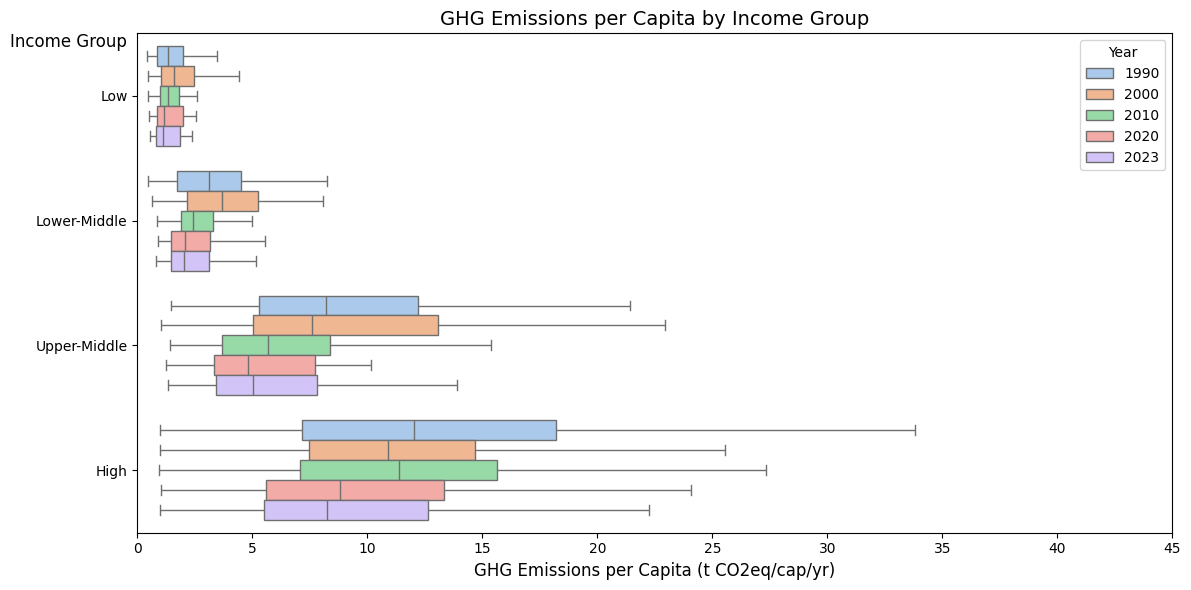

In [ ]:
import seaborn as sns
import matplotlib.transforms as transforms

# Consolidate data for all years
all_years_data = []

years_to_plot = [1990, 2000, 2010, 2020, 2023]

for year in years_to_plot:
    # Create a temporary DataFrame for each year
    temp_df = pd.DataFrame({
        'Year': year,
        'Income_Group': merged_df[f'Income_Group_{year}'],
        'GHG_Emissions': merged_df[f'GHG_Emissions_{year}']
    })
    all_years_data.append(temp_df)

# Combine into one DataFrame
combined_df = pd.concat(all_years_data)

# Clean the data, drop NaN values
combined_df.dropna(subset=['Income_Group', 'GHG_Emissions'], inplace=True)

# Create a single plot with space between the boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=combined_df,
    x='GHG_Emissions',
    y='Income_Group',
    hue='Year',
    order=['Low', 'Lower-Middle', 'Upper-Middle', 'High'],
    orient='h',
    showfliers=False,
    palette='pastel'
)

# Adding space between the groups manually
for patch in plt.gca().patches:
    patch.set_linewidth(1)  # Adds emphasis to boundaries

# Set titles and labels
plt.title('GHG Emissions per Capita by Income Group', fontsize=14)
plt.xlabel('GHG Emissions per Capita (t CO2eq/cap/yr)', fontsize=12)
plt.ylabel(' ', fontsize=12)
# Get the current y-axis and its transform
ax = plt.gca()  # Get the current axes
trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)

# Add the ylabel using the transformed coordinates
plt.text(-0.01, ax.get_ylim()[1], 'Income Group', fontsize=12, ha='right', va='top', transform=trans)

plt.xlim(0, 45)  # Consistent x-axis limits for all boxplots
plt.legend(title='Year', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('Graph2.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
years = [str(year) for year in range(1987, 2024)]

In [ ]:
# Step 1: Merge the DataFrames

merged_df = pd.merge(df[['Country Code', 'Country'] + years ],
                     df_income[['Country Code']+ years],
                     on='Country Code', how='inner')

merged_df.columns = ['Country Code', 'Country'] + [f'{year}_GHG' for year in years] + [f'{year}_Income' for year in years]

In [ ]:
merged_df

,Country Code,Country,1987_GHG,1988_GHG,1989_GHG,1990_GHG,1991_GHG,1992_GHG,1993_GHG,1994_GHG,...,2014_Income,2015_Income,2016_Income,2017_Income,2018_Income,2019_Income,2020_Income,2021_Income,2022_Income,2023_Income
0,ABW,Aruba,2.319985,2.580720,3.487786,3.539583,3.815004,3.981484,3.768460,4.025265,...,H,H,H,H,H,H,H,H,H,H
1,AFG,Afghanistan,1.087010,1.105118,1.049065,1.025512,0.971502,0.832849,0.778118,0.727689,...,L,L,L,L,L,L,L,L,L,L
2,AGO,Angola,2.911911,3.032350,2.983104,2.624188,2.523157,2.357893,2.574085,3.283525,...,UM,UM,LM,LM,LM,LM,LM,LM,LM,LM
3,ALB,Albania,4.319997,4.184951,4.085297,3.502459,2.758736,1.898474,1.940626,2.192953,...,UM,UM,UM,UM,UM,UM,UM,UM,UM,UM
4,ANT,Curaçao,27.811246,24.569887,21.252280,19.385775,20.144945,21.092231,17.542128,19.744133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
income_group_map = {
    'L': 'Low',
    'LM': 'Lower-Middle',
    'UM': 'Upper-Middle',
    'H': 'High'
}

for year in years:
    merged_df[f'Income_Group_{year}'] = merged_df[f'{year}_Income'].map(income_group_map)

In [ ]:
# Drop rows with missing values in GHG or Income Group columns for the years of interest
cleaned_df = merged_df.dropna(subset=[f'{year}_GHG' for year in years] + [f'{year}_Income' for year in years])

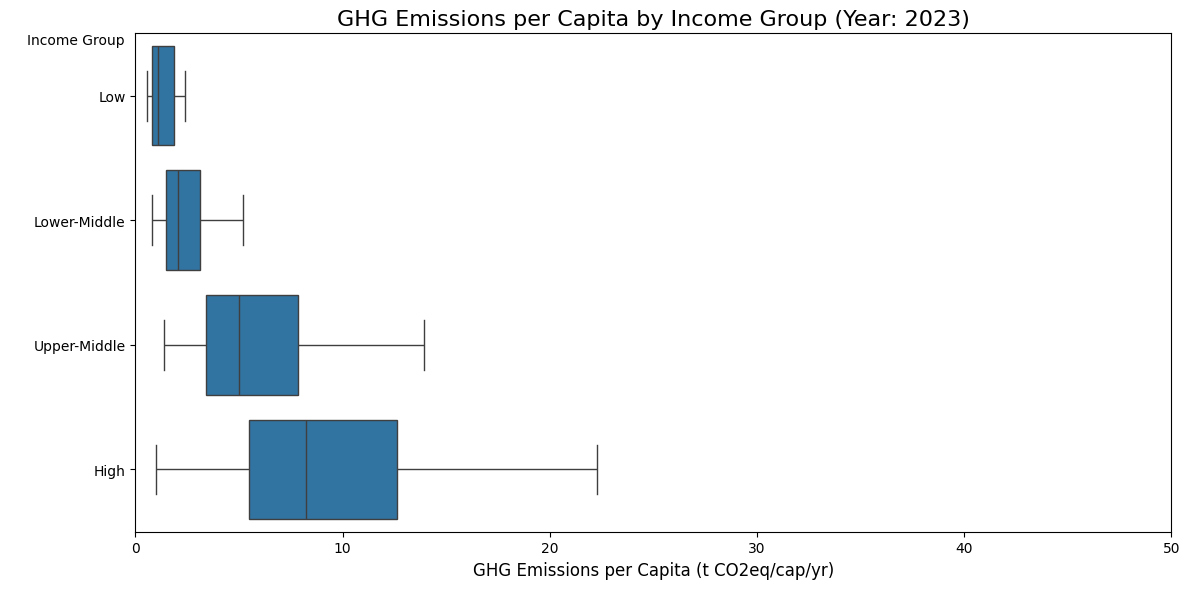

In [ ]:
from matplotlib.animation import FuncAnimation


# Step 7: Prepare the figure for the animation
fig, ax = plt.subplots(figsize=(12, 6))

# Set plot title and axis labels
title = ax.set_title('GHG Emissions per Capita by Income Group (Year: 1987)', fontsize=16)
xlabel = ax.set_xlabel('GHG Emissions per Capita (t CO2eq/cap/yr)', fontsize=14)
ylabel = ax.set_ylabel('Income Group', fontsize=14)


# Step 8: Create the animation function
def update(year):
    year_col_ghg = f'{year}_GHG'  # Column for GHG emissions for the specific year
    year_col_income = f'Income_Group_{year}'  # Column for income group for the specific year


    data_for_year = cleaned_df[['Country', year_col_income, year_col_ghg]]

    # Filter out rows where the income group is NaN for the current year
    data_for_year = data_for_year[data_for_year[year_col_income].notna()]

    # Create the box plot for the specific year, aggregated by income group
    ax.clear()  # Clear the previous plot

    # Check if there's data for all income groups before plotting
    income_groups_present = data_for_year[year_col_income].unique()
    if all(group in income_groups_present for group in income_group_map.values()):
        sns.boxplot(
            y=year_col_income,
            x=year_col_ghg,
            data=data_for_year,
            order=list(income_group_map.values()),  # Use the full income_group_map values
            orient='h',
            ax=ax,
            showfliers=False
        )
    else:
        # Handle the case where not all income groups have data for the year
        ax.text(0.5, 0.5, f"No data for all income groups in {year}",
                horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=12)


    ax.set_xlim(0,50)

    # Update the title for the current year
    #title.set_text(f'GHG Emissions per Capita by Income Group (Year: {year})')
    ax.set_title(f'GHG Emissions per Capita by Income Group (Year: {year})', fontsize=16)
    ax.set_xlabel('GHG Emissions per Capita (t CO2eq/cap/yr)', fontsize=12)
    ax.set_ylabel(' ', fontsize=12)

    # Get the current y-axis and its transform
    ax1 = plt.gca()  # Get the current axes
    trans = transforms.blended_transform_factory(ax1.transAxes, ax1.transData)

    # Add the ylabel using the transformed coordinates
    ax1.text(-0.01, ax1.get_ylim()[1], f'Income Group', fontsize=10, ha='right', va='top', transform=trans)

    plt.tight_layout()

    return title, xlabel, ylabel

# Step 9: Create the animation using FuncAnimation
ani = FuncAnimation(fig, update, frames=range(1987, 2024), repeat=False, interval=1000)

# Step 10: Save the animation as a .gif or .mp4
ani.save('ghg_emissions_animation_by_income_group.gif', writer='imagemagick', fps=2)

# Display the animation
plt.tight_layout()
plt.show()

In [ ]:
file_path = '/content/drive/MyDrive/ECT/EDGAR_2024_GHG_booklet_2024.xlsx'
# Read data from "Sheet6"
df = pd.read_excel(file_path, sheet_name='GHG_totals_by_country', engine='openpyxl')
df.rename(columns={'EDGAR Country Code': 'Country Code'}, inplace=True)
df.columns = df.columns.astype(str)
df

,Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.469468,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.420132,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,77.295699,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031210,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,514.263976,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,ZWE,Zimbabwe,21.723583,22.320466,21.961987,23.569806,23.655384,22.966457,24.095056,23.302597,...,29.122990,30.205254,28.406508,27.886488,29.907540,28.369352,26.770627,28.878405,29.825427,31.019306
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,EU27,EU27,4591.422704,4615.906263,4767.686556,4986.348683,4946.211218,4858.723738,5122.759438,5111.491639,...,3825.528400,3879.728839,3889.377080,3912.269335,3830.658886,3678.016394,3388.278789,3577.018019,3482.310460,3221.794615
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import geopandas as gpd

# Specify the path to the downloaded shapefile
file_path = '/content/ECT/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp'


# Load the shapefile into GeoPandas
world = gpd.read_file(file_path)

# Preview the data
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [ ]:
columns_list = world.columns.tolist()
print(columns_list)

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [ ]:
world.loc[world['NAME_EN'] == 'Norway', 'ISO_A3'] = 'NOR'

In [ ]:
# Extract relevant columns
continent_mapping = world[['ISO_A3', 'CONTINENT']].dropna()

# Convert to a dictionary for easy mapping
continent_map = dict(zip(continent_mapping['ISO_A3'], continent_mapping['CONTINENT']))

In [ ]:
# Map continents to emissions data
df['Continent'] = df['Country Code'].map(continent_map)

# Verify if the mapping worked
df

,Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498,North America
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052,Asia
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756,Africa
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211,North America
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,ZWE,Zimbabwe,21.723583,22.320466,21.961987,23.569806,23.655384,22.966457,24.095056,23.302597,...,30.205254,28.406508,27.886488,29.907540,28.369352,26.770627,28.878405,29.825427,31.019306,Africa
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,EU27,EU27,4591.422704,4615.906263,4767.686556,4986.348683,4946.211218,4858.723738,5122.759438,5111.491639,...,3879.728839,3889.377080,3912.269335,3830.658886,3678.016394,3388.278789,3577.018019,3482.310460,3221.794615,NaN
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['Continent'].isna()]

,Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114,NaN
6,ANT,Curaçao,15.074476,15.075232,14.651375,16.202211,14.668232,10.581695,11.255922,11.392153,...,5.936975,5.161752,4.161313,3.369238,2.610404,2.144213,2.334420,2.419620,2.532144,NaN
66,FRA,France and Monaco,636.650138,647.336158,664.046129,701.615988,682.917068,640.936573,685.645581,668.166510,...,460.379617,461.959181,465.018790,451.870049,441.630678,398.351293,429.487310,416.112202,385.520120,NaN
72,GIB,Gibraltar,0.081879,0.082953,0.072905,0.073436,0.073443,0.076593,0.075969,0.072877,...,0.608967,0.634706,0.672960,0.713673,0.741644,0.662165,0.669606,0.698429,0.712373,NaN
74,GLP,Guadeloupe,0.411646,0.418802,0.445371,0.457068,0.438883,0.472691,0.472958,0.493381,...,1.406990,1.408483,1.407810,1.410566,1.409263,1.407937,1.408188,1.408525,1.462229,NaN
82,GUF,French Guiana,0.112426,0.113262,0.132785,0.134118,0.121210,0.142820,0.131782,0.145998,...,0.518001,0.530049,0.529533,0.535967,0.542109,0.544021,0.551929,0.553825,0.573387,NaN
131,MTQ,Martinique,0.363124,0.372851,0.417257,0.422963,0.400641,0.441310,0.425669,0.451664,...,1.169295,1.170377,1.171070,1.166570,1.165866,0.898353,1.041111,1.166371,1.218420,NaN
158,REU,Réunion,0.515290,0.514690,0.518298,0.535649,0.560981,0.576289,0.605513,0.635958,...,2.884773,2.902436,2.903849,2.912301,2.908501,2.895956,2.902265,2.904735,2.920698,NaN
163,SCG,Serbia and Montenegro,45.956694,46.924951,46.764937,50.022259,53.635336,55.804233,57.241865,59.132969,...,69.872169,72.067910,72.083709,70.326357,70.627154,71.438886,69.458883,69.030816,67.214992,NaN
165,SEA,International Shipping,375.869284,375.869284,393.809699,416.834882,390.055566,363.625445,375.818516,375.763134,...,702.185529,721.171997,748.925763,752.118659,735.346538,671.578717,692.682465,739.009249,746.943682,NaN


In [ ]:
# Step 1: Data Preprocessing - Remove rows with missing country or continent data
df = df[df['Country'] != 'EU27']  # Remove the 'GLOBAL TOTAL' row

In [ ]:
# Extract the global total emissions row for 1970 to 2023 (ignoring the first two columns)
global_total_emissions = df[df['Country'] == 'GLOBAL TOTAL'].iloc[:, 2:-1].values.flatten()
global_total_emissions

array([24002.75173656, 24048.40821669, 24971.27872629, 26185.41869798,
       26182.14841976, 26194.50367661, 27323.85886251, 27990.64833003,
       28695.04598176, 29385.10667215, 29094.82843505, 28567.59025833,
       28355.74766383, 28582.58351145, 29372.7891181 , 29672.2726661 ,
       30150.59868874, 30886.54273122, 31835.61841127, 32401.59200886,
       32726.22802224, 32778.70729997, 32691.24471282, 32754.49960139,
       33105.29660847, 33930.45346483, 34568.27176968, 34977.18082757,
       35063.25696746, 35288.37901852, 36175.1463395 , 36459.50524562,
       36898.84109289, 38408.48924375, 39984.01149384, 41296.88492151,
       42471.71765533, 43748.94101206, 44027.32504993, 43604.46351724,
       45814.94338546, 47176.99628959, 47789.98968753, 48587.89910588,
       48930.17683651, 48808.76717647, 49058.44125619, 49878.73380863,
       51026.62744902, 51278.34791975, 49327.5388852 , 51568.25003211,
       51968.47160064, 52962.9008587 ])

In [ ]:
continent_emissions = df.groupby('Continent').sum().iloc[:, 1:]
continent_emissions

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,AngolaBurundiBeninBurkina FasoBotswanaCentral ...,1094.150274,1106.197330,1155.213008,1230.954326,1250.583006,1220.624363,1324.649732,1348.331211,1342.097559,...,2924.461378,2945.705187,2984.196438,3052.944855,3113.694575,3167.907334,3039.820588,3154.880498,3167.378308,3187.918800
Asia,AfghanistanUnited Arab EmiratesArmeniaAzerbaij...,6333.454557,6418.396992,6638.748514,7017.192986,7092.539129,7331.491763,7553.067700,7875.334729,8173.486581,...,26151.563305,26071.456347,26393.772305,27076.360019,27943.017312,28369.944403,28197.029577,29406.379807,29667.625836,30823.386493
Europe,AlbaniaAustriaBelgiumBulgariaBosnia and Herzeg...,7395.133641,7424.811851,7664.400904,8039.518022,8093.857000,8167.275584,8501.856492,8582.262423,8922.838042,...,6753.444724,6743.495556,6726.434139,6763.060807,6804.314912,6711.590157,6319.336254,6646.912444,6554.674908,6344.048504
North America,ArubaAnguillaAntigua and BarbudaBahamasBelizeB...,6615.744448,6501.747972,6816.281515,7063.701532,6913.767332,6692.185084,7039.588055,7239.454062,7270.122883,...,8173.260175,8069.556537,7951.352039,7917.674843,8113.815540,8001.672991,7308.777458,7688.814986,7773.460256,7726.506497
Oceania,AustraliaCook IslandsFijiKiribatiNew Caledonia...,379.931315,384.564709,401.133139,410.095539,426.993114,434.736826,440.193133,448.221185,439.136067,...,708.146217,709.837171,712.343796,723.329582,722.683746,722.371555,693.919196,688.866876,676.892055,681.245851
Seven seas (open ocean),"MaldivesMauritiusSaint Helena, Ascension and T...",0.979807,1.023510,1.068894,1.119334,1.188281,1.204524,1.276988,1.392164,1.408709,...,8.860982,8.348292,8.732645,9.121012,9.310643,9.810324,9.509311,9.952359,10.283756,10.646669
South America,ArgentinaBoliviaBrazilChileColombiaEcuadorFalk...,935.844716,952.492218,991.114177,1046.241475,1077.187094,1097.162047,1154.069909,1185.804547,1208.269838,...,2491.373077,2472.051514,2446.971717,2441.596313,2411.231730,2404.604496,2306.592622,2436.178155,2467.899288,2481.871885


In [ ]:
# Ensure all columns used for calculation are numeric
continent_emissions = continent_emissions.apply(pd.to_numeric, errors='coerce') # Convert to numeric, non-numeric to NaN

continent_contribution = continent_emissions.sum(axis=1) / global_total_emissions.sum()
continent_contribution

,0
Continent,
Africa,0.056170
Asia,0.419719
Europe,0.212244
North America,0.208612
Oceania,0.015741
Seven seas (open ocean),0.000120
South America,0.047471


In [ ]:
# Drop the 'Country' column
continent_emissions = continent_emissions.drop(columns=['Country'], errors='ignore')



In [ ]:
continent_emissions

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,1094.150274,1106.197330,1155.213008,1230.954326,1250.583006,1220.624363,1324.649732,1348.331211,1342.097559,1442.168570,...,2924.461378,2945.705187,2984.196438,3052.944855,3113.694575,3167.907334,3039.820588,3154.880498,3167.378308,3187.918800
Asia,6333.454557,6418.396992,6638.748514,7017.192986,7092.539129,7331.491763,7553.067700,7875.334729,8173.486581,8344.510200,...,26151.563305,26071.456347,26393.772305,27076.360019,27943.017312,28369.944403,28197.029577,29406.379807,29667.625836,30823.386493
Europe,7395.133641,7424.811851,7664.400904,8039.518022,8093.857000,8167.275584,8501.856492,8582.262423,8922.838042,9172.289682,...,6753.444724,6743.495556,6726.434139,6763.060807,6804.314912,6711.590157,6319.336254,6646.912444,6554.674908,6344.048504
North America,6615.744448,6501.747972,6816.281515,7063.701532,6913.767332,6692.185084,7039.588055,7239.454062,7270.122883,7359.655204,...,8173.260175,8069.556537,7951.352039,7917.674843,8113.815540,8001.672991,7308.777458,7688.814986,7773.460256,7726.506497
Oceania,379.931315,384.564709,401.133139,410.095539,426.993114,434.736826,440.193133,448.221185,439.136067,441.828438,...,708.146217,709.837171,712.343796,723.329582,722.683746,722.371555,693.919196,688.866876,676.892055,681.245851
Seven seas (open ocean),0.979807,1.023510,1.068894,1.119334,1.188281,1.204524,1.276988,1.392164,1.408709,1.443863,...,8.860982,8.348292,8.732645,9.121012,9.310643,9.810324,9.509311,9.952359,10.283756,10.646669
South America,935.844716,952.492218,991.114177,1046.241475,1077.187094,1097.162047,1154.069909,1185.804547,1208.269838,1255.957992,...,2491.373077,2472.051514,2446.971717,2441.596313,2411.231730,2404.604496,2306.592622,2436.178155,2467.899288,2481.871885


In [ ]:
continent_emissions.columns = continent_emissions.columns.astype(int)
#global_total_emissions.columns = global_total_emissions.columns.astype(int)

# Drop the 'Country' column and 'Seven seas' row if present
continent_emissions = continent_emissions.drop(columns=['Country'], errors='ignore')
continent_emissions = continent_emissions.drop(index='Seven seas (open ocean)', errors='ignore')

# Step 3: Normalize the continent emissions by dividing by the global total emissions for each year
continent_normalized = continent_emissions.div(global_total_emissions, axis=1)


df = df[df['Country Code'] != 'GLOBAL TOTAL']
df.dropna(how='all', inplace=True)


# Drop the 'Country' column and 'Seven seas' row if present
continent_emissions = continent_emissions.drop(columns=['Country'], errors='ignore')
continent_emissions = continent_emissions.drop(index='Seven seas (open ocean)', errors='ignore')

# Normalize continent emissions by dividing by global total emissions for each year
continent_normalized = continent_emissions.div(global_total_emissions, axis=1)

# Now let's prepare the data for plotting country-level contributions per continent
continents = continent_emissions.index.tolist()

<ipython-input-34-f07c720956d4>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df

,Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498,North America
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052,Asia
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756,Africa
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211,North America
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,WSM,Samoa,0.157804,0.158061,0.162919,0.178156,0.201811,0.189211,0.190172,0.195352,...,0.565776,0.572071,0.568273,0.548016,0.570495,0.565562,0.617131,0.635670,0.646144,Oceania
206,YEM,Yemen,5.397884,5.694599,5.955398,6.260079,6.483728,6.502045,6.816709,6.938345,...,31.425993,27.158584,28.836472,31.936295,33.620228,32.878086,33.430707,33.175042,32.242872,Asia
207,ZAF,South Africa,241.122287,240.628058,247.926802,267.008805,276.088222,294.291848,310.314306,312.548961,...,583.292557,583.291494,595.317587,598.069377,602.850939,541.709644,550.984438,533.026896,522.115491,Africa
208,ZMB,Zambia,12.463517,12.718537,13.299005,13.759407,13.976796,14.269532,14.699720,14.445728,...,23.615690,24.219765,25.930251,27.255061,26.824978,27.344120,28.249100,29.845830,30.484449,Africa


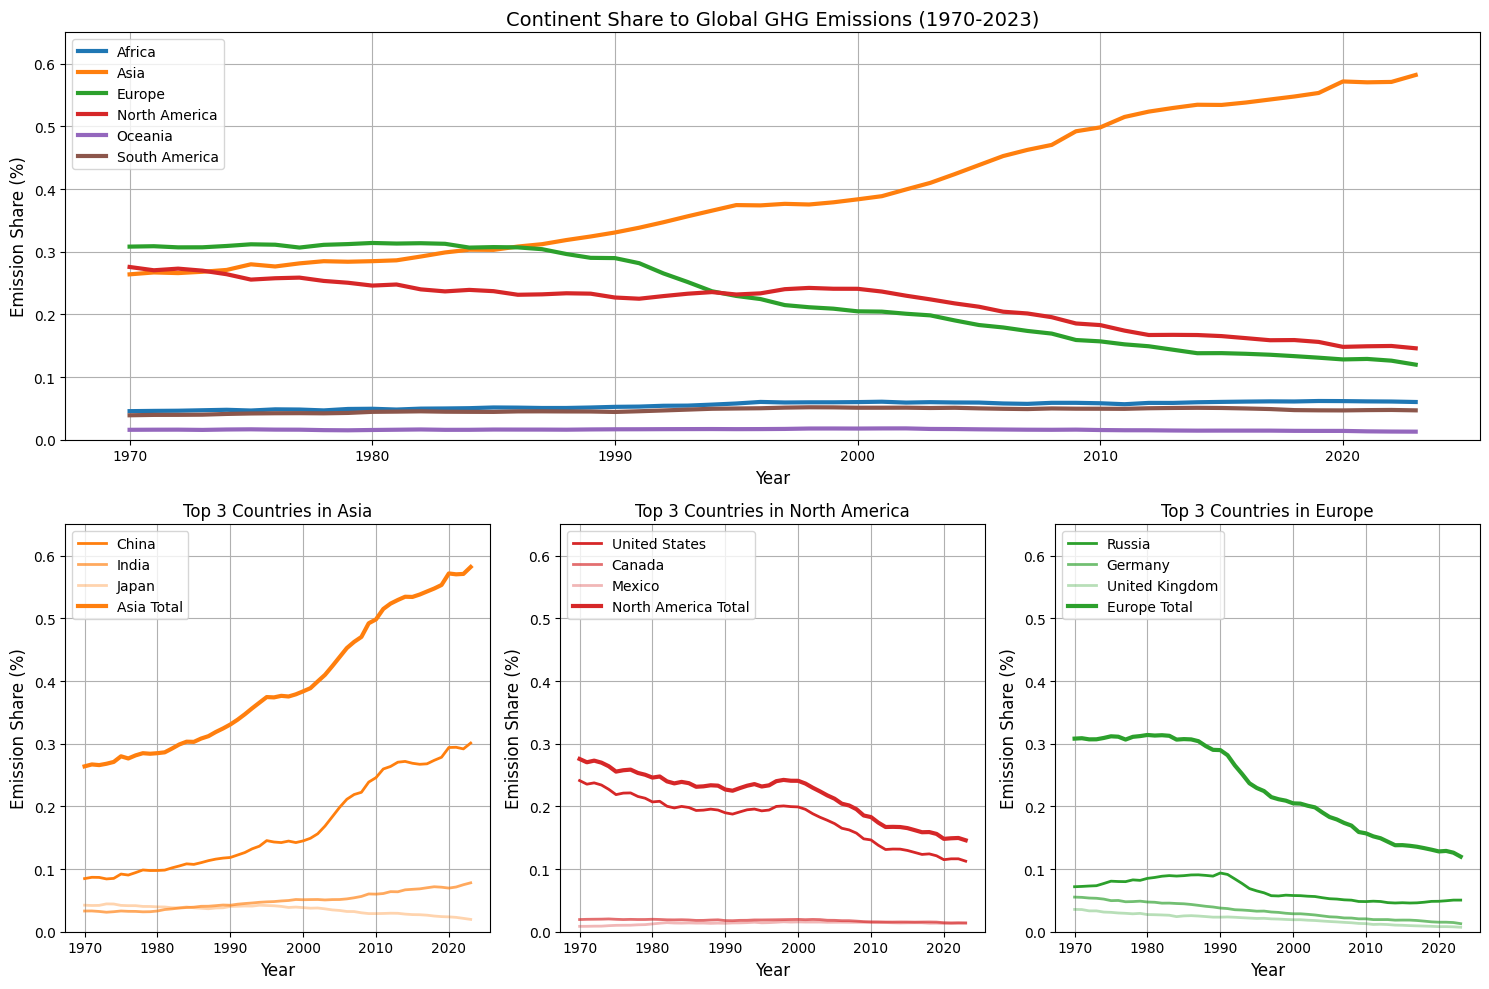

In [ ]:
import matplotlib.cm as cm
from matplotlib.colors import to_rgba
from matplotlib.gridspec import GridSpec

# Function to generate shades of a given color
def generate_shades(color, num_shades):
    """
    Generate a list of shades of a given color by varying the alpha and lightness.
    The color is expected in the form of a string (e.g., 'orange') or an RGB tuple.
    """
    rgba_color = to_rgba(color)  # Convert to RGBA format
    shades = []
    for i in range(num_shades):
        # Vary the alpha (opacity) and/or lightness of the color
        # Modify the lightness to generate lighter and darker shades
        alpha = rgba_color[3] * (1 - (i / num_shades))  # Make the color more opaque for each shade
        shade = (rgba_color[0], rgba_color[1], rgba_color[2], alpha)
        shades.append(shade)
    return shades

# Create a figure
fig = plt.figure(figsize=(15, 10))

# Create a GridSpec with 2 rows and 3 columns
gs = GridSpec(2, 3, figure=fig)

# First, create a color dictionary from the first plot (for global continent contributions)
colors = {
    'Asia': '#FF5733',  # Red-Orange
    'North America': '#33B5FF',  # Sky Blue
    'Europe': '#2E8B57',  # Sea Green
    'Africa': '#FFD700',  # Gold
    'South America': '#8B4513',  # Saddle Brown
    'Oceania': '#DA70D6',  # Orchid
    'Antarctica': '#A9A9A9'  # Dark Gray (for Antarctica)
}

# Add the first subplot that spans across all three columns in the first row
ax1 = fig.add_subplot(gs[0, :])  # Span across all three columns in the first row

# Loop to assign colors to continents (using ax1 instead of axes)
for continent in continent_normalized.index:
    # Assign the color from the first plot (using the color of each line)
    line, = ax1.plot(continent_normalized.columns, continent_normalized.loc[continent]) # Change: Use ax1 instead of axes[0, 0]
    colors[continent] = line.get_color()  # Save the color of the continent in the dictionary


for continent in continent_normalized.index:
    ax1.plot(continent_normalized.columns, continent_normalized.loc[continent], linewidth=3, label=continent, color=colors[continent])

ax1.set_title('Continent Share to Global GHG Emissions (1970-2023)', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Emission Share (%)', fontsize=12)
ax1.legend(bbox_to_anchor=(0, 1), loc='upper left')
ax1.set_ylim(0, 0.65)  # Set y-axis limit
ax1.grid(True)  # Add grid lines

# Now, plotting for Asia, North America, and Europe in subplots 2, 3, and 4 respectively
continents_to_plot = ['Asia', 'North America', 'Europe']

for i, continent in enumerate(continents_to_plot):
    ax = fig.add_subplot(gs[1, i])  # Select the correct subplot position in the second row (0, 0), (0, 1), etc.

    if continent == 'Seven seas (open ocean)':
        continue

    # Get the countries in this continent
    countries_in_continent = df[df['Continent'] == continent]

    # Calculate total emissions per country (sum of emissions over all years)
    country_totals = countries_in_continent.iloc[:, 2:-1].sum(axis=1)

    # Sort countries by total emissions in descending order and get the top 5
    top_countries = countries_in_continent.loc[country_totals.sort_values(ascending=False).head(3).index]

    # Get the main color for the continent
    main_color = colors[continent]  # This will be a string like 'orange' for Asia

    # Generate shades of that main color for the countries (5 shades)
    color_palette = generate_shades(main_color, len(top_countries))

    # Plotting for each top country within the continent
    for idx, (_, row) in enumerate(top_countries.iterrows()):
        country_emissions = row[2:-1]  # Assuming the first two columns are Country Code and Country Name

        # Convert country_emissions to numeric (to avoid the dtype problem)
        country_emissions = pd.to_numeric(country_emissions, errors='coerce')

        # Normalize the country's emissions by dividing by the global_total_emissions for each year
        country_emissions.index = country_emissions.index.astype(str)
        country_normalized = country_emissions / global_total_emissions
        country_normalized.index = country_normalized.index.astype(int)  # Convert index to integers if needed

        # Get the color for this country from the color palette
        country_color = color_palette[idx]

        # Plot the normalized contributions of each top country with a specific color from the palette
        ax.plot(country_normalized.index, country_normalized.values, label=row['Country'], color=country_color, linewidth=2)

    # Plot the continent's total contribution with the same color as in the first subplot
    ax.plot(continent_normalized.columns, continent_normalized.loc[continent], label=f'{continent} Total', color=main_color, linewidth=3)

    ax.set_title(f'Top 3 Countries in {continent}', fontsize=12)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Emission Share (%)', fontsize=12)
    ax.legend(bbox_to_anchor=(0, 1), loc='upper left')
    ax.set_ylim(0, 0.65)  # Set y-axis limit
    ax.grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()

plt.savefig('Graph3.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
print(world.columns.tolist())

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

In [ ]:
df

,Country Code,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
0,ABW,Aruba,0.036713,0.041538,0.052391,0.057360,0.056630,0.070743,0.069793,0.080624,...,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498,North America
1,AFG,Afghanistan,15.437430,15.364077,13.316628,13.934875,15.177862,15.843058,15.943325,16.088215,...,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052,Asia
2,AGO,Angola,18.998763,18.866057,21.459002,23.018941,23.685423,22.519608,18.586243,23.251029,...,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756,Africa
3,AIA,Anguilla,0.003355,0.003396,0.003534,0.003411,0.003694,0.003968,0.003833,0.003960,...,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211,North America
4,AIR,International Aviation,172.478021,172.465452,182.459819,190.296910,183.162104,177.165836,177.483077,193.593366,...,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,WSM,Samoa,0.157804,0.158061,0.162919,0.178156,0.201811,0.189211,0.190172,0.195352,...,0.565776,0.572071,0.568273,0.548016,0.570495,0.565562,0.617131,0.635670,0.646144,Oceania
206,YEM,Yemen,5.397884,5.694599,5.955398,6.260079,6.483728,6.502045,6.816709,6.938345,...,31.425993,27.158584,28.836472,31.936295,33.620228,32.878086,33.430707,33.175042,32.242872,Asia
207,ZAF,South Africa,241.122287,240.628058,247.926802,267.008805,276.088222,294.291848,310.314306,312.548961,...,583.292557,583.291494,595.317587,598.069377,602.850939,541.709644,550.984438,533.026896,522.115491,Africa
208,ZMB,Zambia,12.463517,12.718537,13.299005,13.759407,13.976796,14.269532,14.699720,14.445728,...,23.615690,24.219765,25.930251,27.255061,26.824978,27.344120,28.249100,29.845830,30.484449,Africa


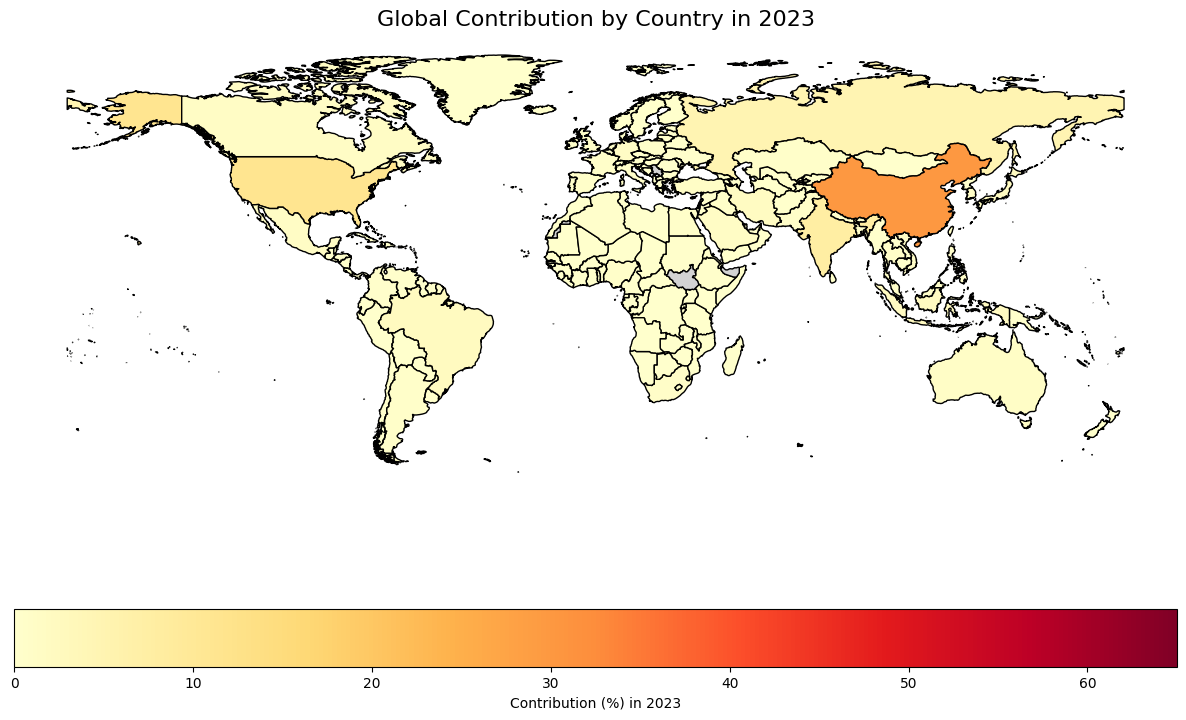

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the global total for 2023
global_total_2023 = df['2023'].sum()

# Step 2: Compute contribution percentages
df['Contribution_2023'] = (df['2023'] / global_total_2023) * 100

# Step 3: Merge with the GeoDataFrame
world = world.rename(columns={"ADM0_A3": "Country Code"})
merged = world.merge(df[['Country Code', 'Contribution_2023']], on='Country Code', how='left')

# Step 4: Remove Antarctica by filtering out rows where the continent is 'Antarctica'
merged = merged[merged['CONTINENT'] != 'Antarctica']


# Filter out these countries from the merged GeoDataFrame
merged = merged[~merged['NAME'].isin(small_islands)]

# Step 6: Plot the map with a warm, neutral color palette and set the z-axis from 0 to 65
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Contribution_2023',
            cmap='YlOrRd',  # Warm and neutral color palette
            legend=True,
            legend_kwds={'label': "Contribution (%) in 2023", 'orientation': "horizontal"},
            missing_kwds={"color": "lightgrey", "label": "No data"},
            vmin=0, vmax=65,  # Set the z-axis range from 0 to 65
            ax=ax,
            edgecolor='black')  # Add country boundary lines

# Customize plot
ax.set_title('Global Contribution by Country in 2023', fontsize=16)
ax.axis('off')

plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os

# Step 1: Calculate the global total for each year
years = [str(year) for year in range(1970, 2024)]  # 1970 to 2023

# Create a list to store the filenames of the frames
filenames = []

# Step 2: Loop through the years to create each frame for the GIF
for year in years:
    # Step 2.1: Compute contribution percentages for the specific year
    global_total = df[year].sum()
    df[f'Contribution_{year}'] = (df[year] / global_total) * 100

    # Step 2.2: Merge with the GeoDataFrame
    merged = world.rename(columns={"ADM0_A3": "Country Code"})
    merged = merged.merge(df[['Country Code', f'Contribution_{year}']], on='Country Code', how='left')

    # Step 2.3: Remove Antarctica
    merged = merged[merged['CONTINENT'] != 'Antarctica']

    # Step 2.4: Filter out small island countries (from the previous list)
    merged = merged[~merged['NAME'].isin(small_islands)]

    # Step 3: Plot the map with a warm, neutral color palette and set the z-axis range
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged.plot(column=f'Contribution_{year}',
                cmap='YlOrRd',  # Warm and neutral color palette
                legend=True,
                legend_kwds={'label': f"Share (%) in {year}", 'orientation': "horizontal", 'fraction': 0.02},
                missing_kwds={"color": "lightgrey", "label": "No data"},
                vmin=0, vmax=40,  # Set the z-axis range from 0 to 65
                ax=ax,
                edgecolor='black')  # Add country boundary lines

    # Customize plot
    ax.set_title(f'Global Contribution by Country in {year}', fontsize=16)
    ax.axis('off')
    plt.tight_layout()


    # Step 4: Save each frame as an image
    filename = f"contribution_{year}.png"
    plt.savefig(filename)
    filenames.append(filename)
    plt.close(fig)  # Close the figure to avoid displaying it

# Step 5: Create a GIF from the saved frames with the desired settings
with imageio.get_writer('contribution_evolution.gif', mode='I', fps=2, loop=20) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Step 6: Clean up by removing the individual image files (optional)
for filename in filenames:
    os.remove(filename)


<ipython-input-59-67f5fbfb556b>:55: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



In [ ]:
df_all

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Continent
0,Admin-0 country,3.0,5.0,Netherlands,NL1,1.0,2.0,Country,1,Aruba,...,0.490990,0.514539,0.496141,0.495532,0.588998,0.482160,0.531202,0.533603,0.561498,North America
1,Admin-0 country,1.0,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,1,Afghanistan,...,27.408332,26.633999,27.691927,27.553282,26.982777,26.646320,27.643074,28.614071,29.460052,Asia
2,Admin-0 country,1.0,3.0,Angola,AGO,0.0,2.0,Sovereign country,1,Angola,...,81.775031,78.875889,73.424409,69.504638,69.910832,61.680081,64.408994,67.210842,67.700756,Africa
3,Admin-0 country,1.0,6.0,United Kingdom,GB1,1.0,2.0,Dependency,1,Anguilla,...,0.031334,0.031728,0.032476,0.031594,0.030948,0.026037,0.025224,0.025068,0.026211,North America
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,543.354255,567.631287,597.771580,624.135612,633.464502,302.632337,335.728729,416.953422,498.178114,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Admin-0 country,1.0,4.0,Samoa,WSM,0.0,2.0,Sovereign country,1,Samoa,...,0.565776,0.572071,0.568273,0.548016,0.570495,0.565562,0.617131,0.635670,0.646144,Oceania
206,Admin-0 country,1.0,3.0,Yemen,YEM,0.0,2.0,Sovereign country,1,Yemen,...,31.425993,27.158584,28.836472,31.936295,33.620228,32.878086,33.430707,33.175042,32.242872,Asia
207,Admin-0 country,1.0,2.0,South Africa,ZAF,0.0,2.0,Sovereign country,1,South Africa,...,583.292557,583.291494,595.317587,598.069377,602.850939,541.709644,550.984438,533.026896,522.115491,Africa
208,Admin-0 country,1.0,3.0,Zambia,ZMB,0.0,2.0,Sovereign country,1,Zambia,...,23.615690,24.219765,25.930251,27.255061,26.824978,27.344120,28.249100,29.845830,30.484449,Africa


In [ ]:
df_all.columns.tolist()

['featurecla',
 'scalerank',
 'LABELRANK',
 'SOVEREIGNT',
 'SOV_A3',
 'ADM0_DIF',
 'LEVEL',
 'TYPE',
 'TLC',
 'ADMIN',
 'ADM0_A3',
 'GEOU_DIF',
 'GEOUNIT',
 'GU_A3',
 'SU_DIF',
 'SUBUNIT',
 'SU_A3',
 'BRK_DIFF',
 'NAME',
 'NAME_LONG',
 'BRK_A3',
 'BRK_NAME',
 'BRK_GROUP',
 'ABBREV',
 'POSTAL',
 'FORMAL_EN',
 'FORMAL_FR',
 'NAME_CIAWF',
 'NOTE_ADM0',
 'NOTE_BRK',
 'NAME_SORT',
 'NAME_ALT',
 'MAPCOLOR7',
 'MAPCOLOR8',
 'MAPCOLOR9',
 'MAPCOLOR13',
 'POP_EST',
 'POP_RANK',
 'POP_YEAR',
 'GDP_MD',
 'GDP_YEAR',
 'ECONOMY',
 'INCOME_GRP',
 'FIPS_10',
 'ISO_A2',
 'ISO_A2_EH',
 'ISO_A3',
 'ISO_A3_EH',
 'ISO_N3',
 'ISO_N3_EH',
 'UN_A3',
 'WB_A2',
 'WB_A3',
 'WOE_ID',
 'WOE_ID_EH',
 'WOE_NOTE',
 'ADM0_ISO',
 'ADM0_DIFF',
 'ADM0_TLC',
 'ADM0_A3_US',
 'ADM0_A3_FR',
 'ADM0_A3_RU',
 'ADM0_A3_ES',
 'ADM0_A3_CN',
 'ADM0_A3_TW',
 'ADM0_A3_IN',
 'ADM0_A3_NP',
 'ADM0_A3_PK',
 'ADM0_A3_DE',
 'ADM0_A3_GB',
 'ADM0_A3_BR',
 'ADM0_A3_IL',
 'ADM0_A3_PS',
 'ADM0_A3_SA',
 'ADM0_A3_EG',
 'ADM0_A3_MA',
 'ADM0_A3_PT

In [ ]:
world = df_all.copy()

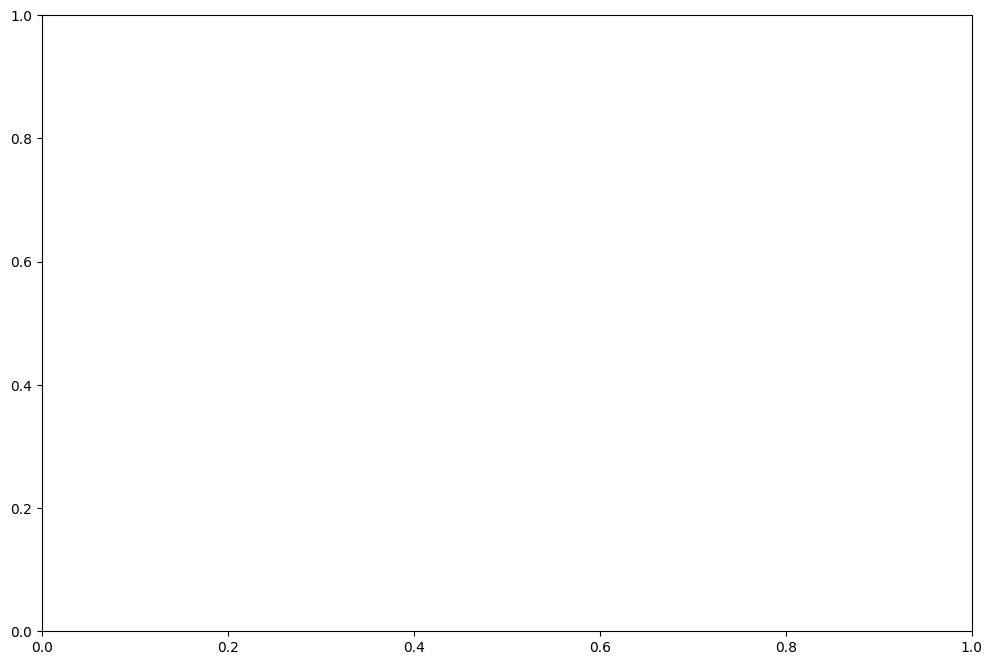

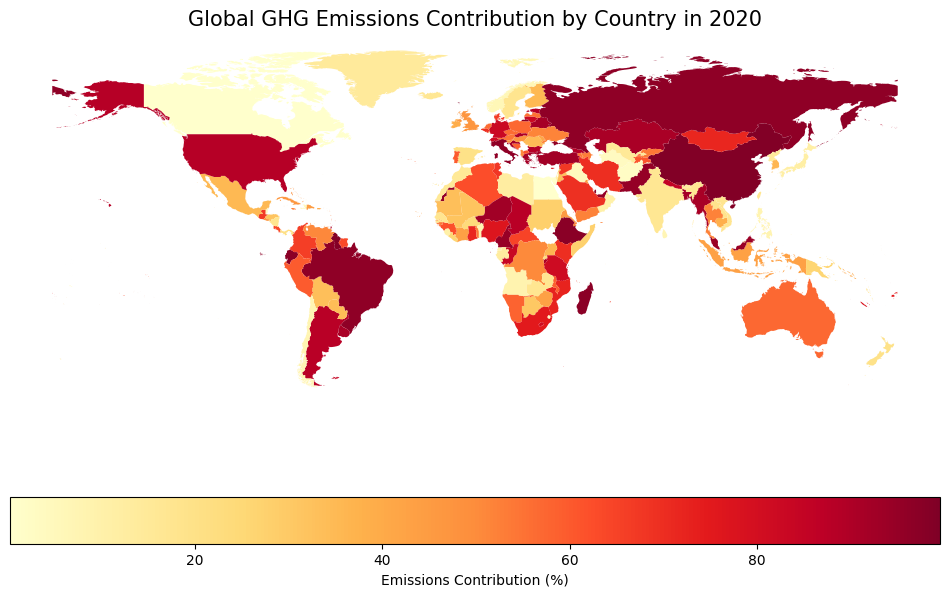

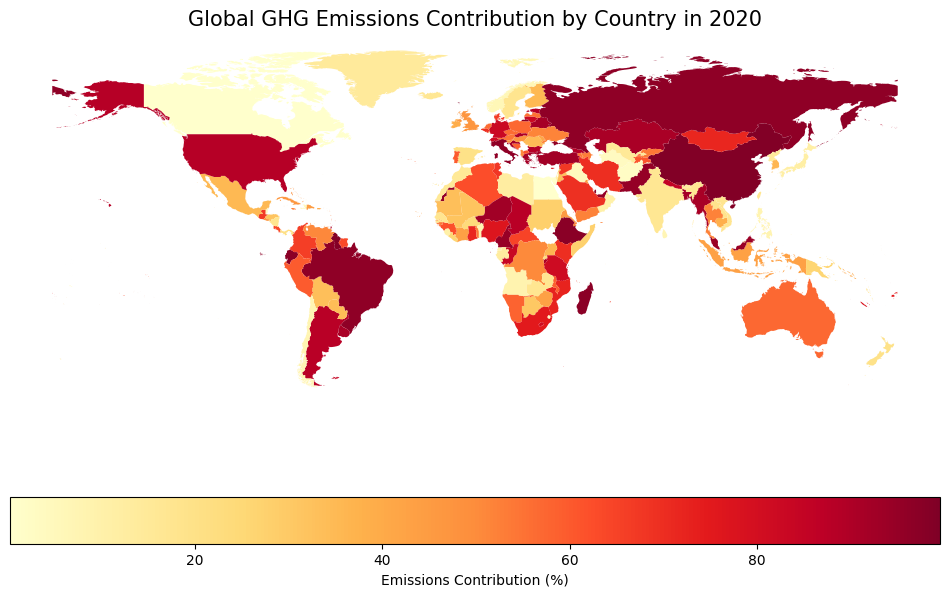

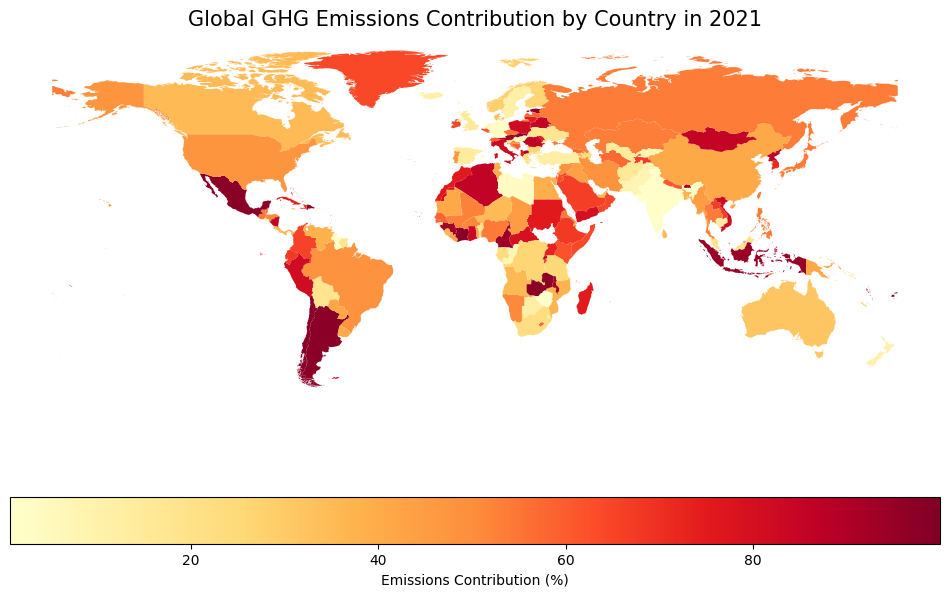

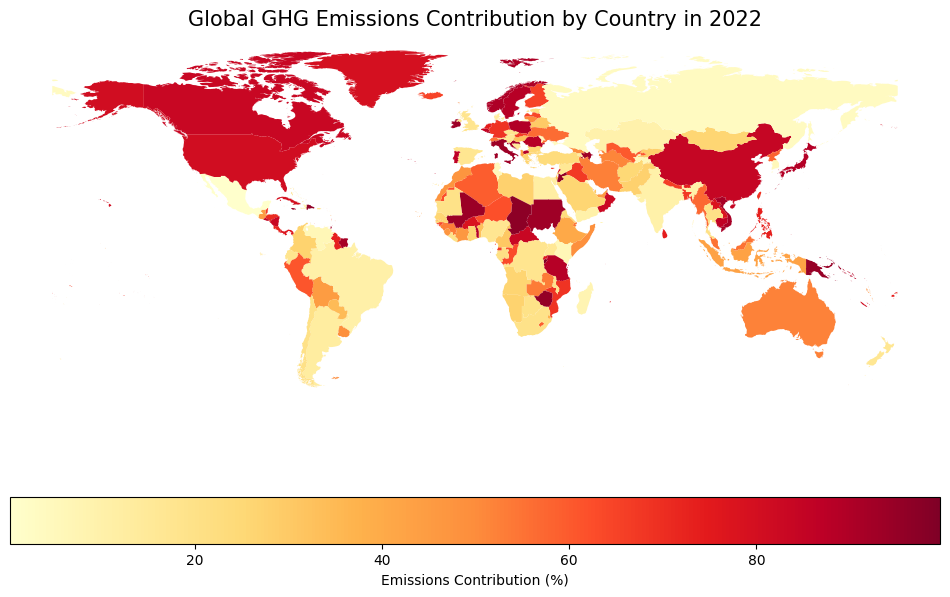

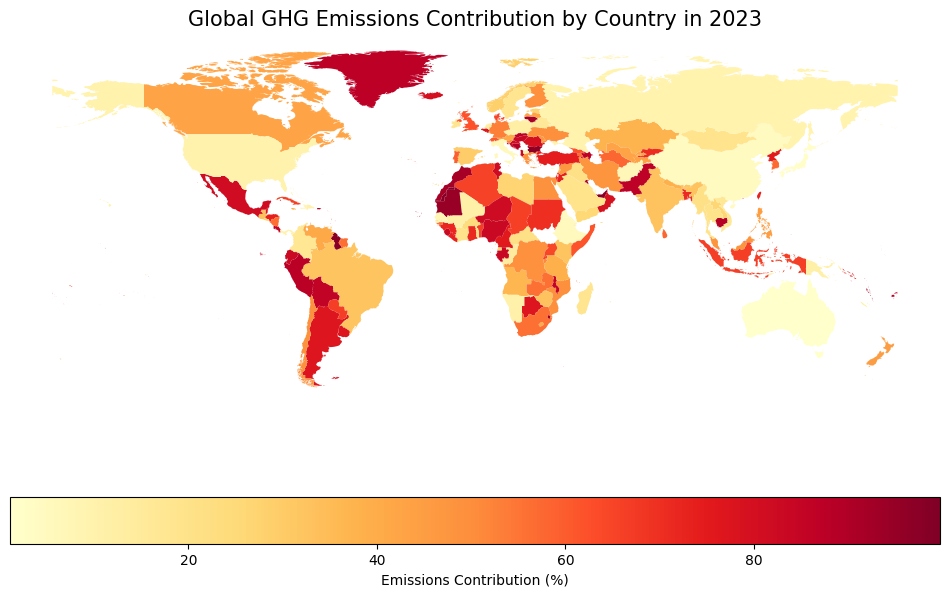

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Define years for the animation
years = list(range(2020, 2024))

# Function to update the map for each year
def update_map(year):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Convert year to string to match column names in the GeoDataFrame
    year_str = str(year)

    # Set color mapping based on emissions for the selected year
    norm = plt.Normalize(vmin=world[year_str].min(), vmax=world[year_str].max())

    # Plot the world map colored by emissions for the selected year
    world.plot(column=year_str, ax=ax, legend=True, cmap='YlOrRd', norm=norm,  # Use year_str here
               legend_kwds={'label': "Emissions Contribution (%)",
                            'orientation': "horizontal"})

    # Set title and axis labels
    ax.set_title(f"Global GHG Emissions Contribution by Country in {year}", fontsize=15)
    ax.set_axis_off()  # Remove axis
    return ax

# Create the animation
fig, ax = plt.subplots(figsize=(12, 8))
ani = FuncAnimation(fig, update_map, frames=years, repeat=False, interval=1000)

# Save the animation as a GIF file
ani.save('emissions_animation.gif', writer='imagemagick', fps=1) # Changed to 'pillow' and .gif

# Show the plot
plt.show()